## Titanic Dataset Comprehensive Analysis

This notebook is a comprehensive analysis of the Titanic dataset, following the structure and content of the provided notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
# Load the Titanic dataset
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


### Data Overview

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [48]:
df.describe(include='all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


### Data Cleaning and Preprocessing

In [40]:
# Drop less informative columns
df.drop(['embarked'], axis=1, inplace=True)

In [49]:
# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

<ipython-input-49-91375abcaa1f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-49-91375abcaa1f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [50]:
# Confirm missing values
print(df.isnull().sum())

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
dtype: int64


### Univariate Analysis

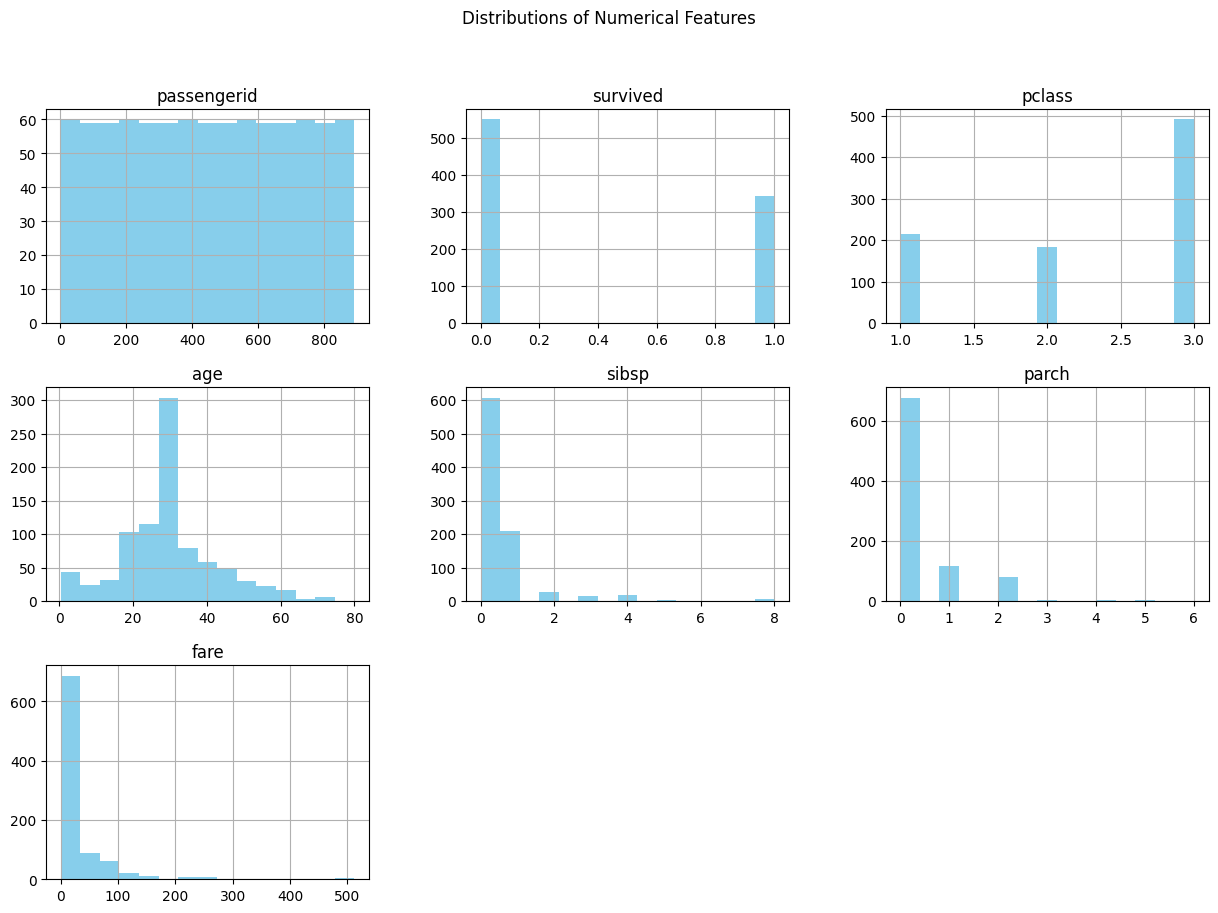

In [51]:
# Distribution of numerical features
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle('Distributions of Numerical Features')
plt.show()

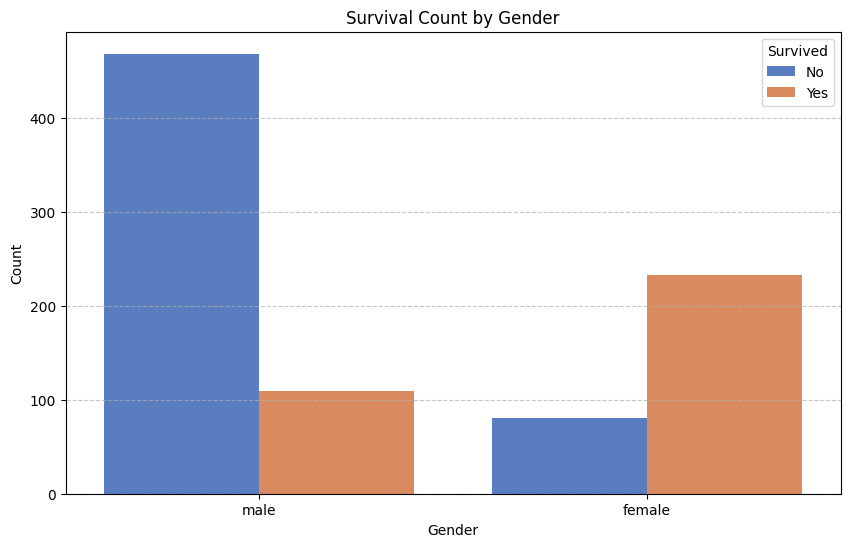

In [52]:
# Bar Plot: Survival Count by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df, palette='muted')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-56-c09409cc6c8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='pclass', y='age', data=df, palette='pastel', inner='quartile')


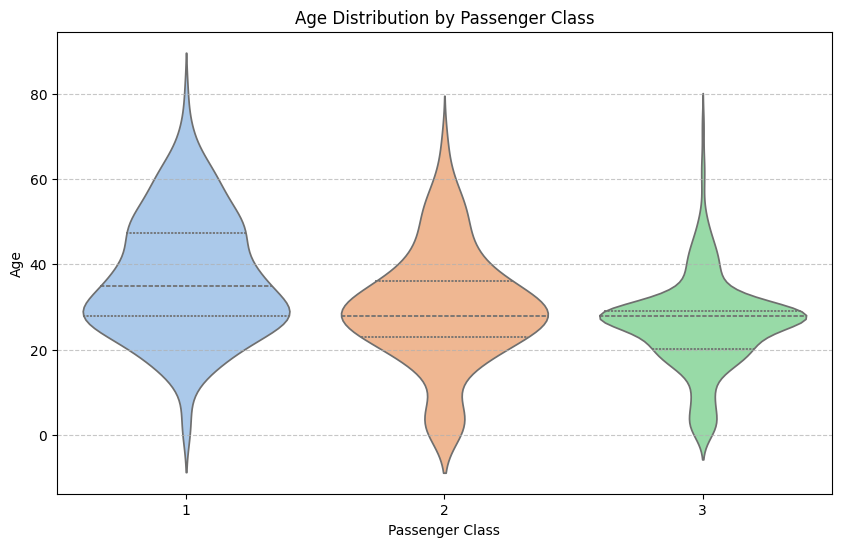

In [56]:
# Violin Plot: Age Distribution by Class
plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', data=df, palette='pastel', inner='quartile')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

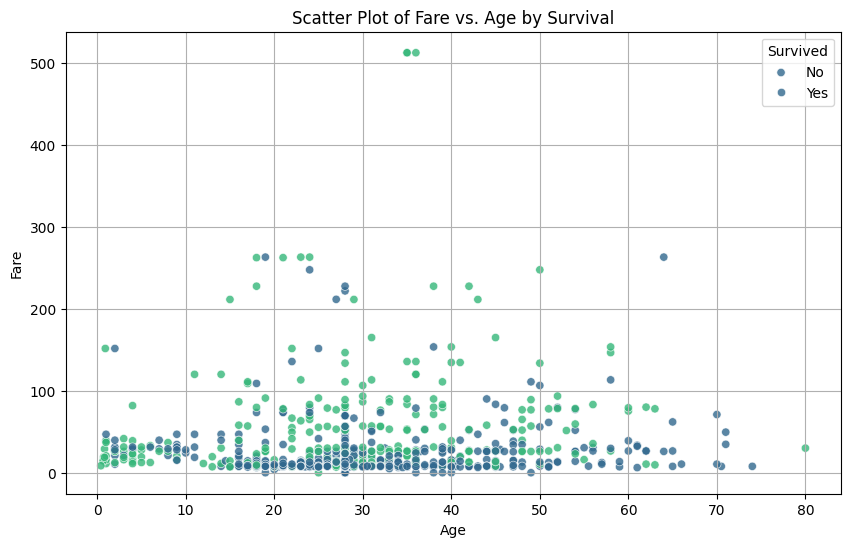

In [57]:
# Scatter Plot: Fare vs. Age by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, palette='viridis', alpha=0.8)
plt.title('Scatter Plot of Fare vs. Age by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

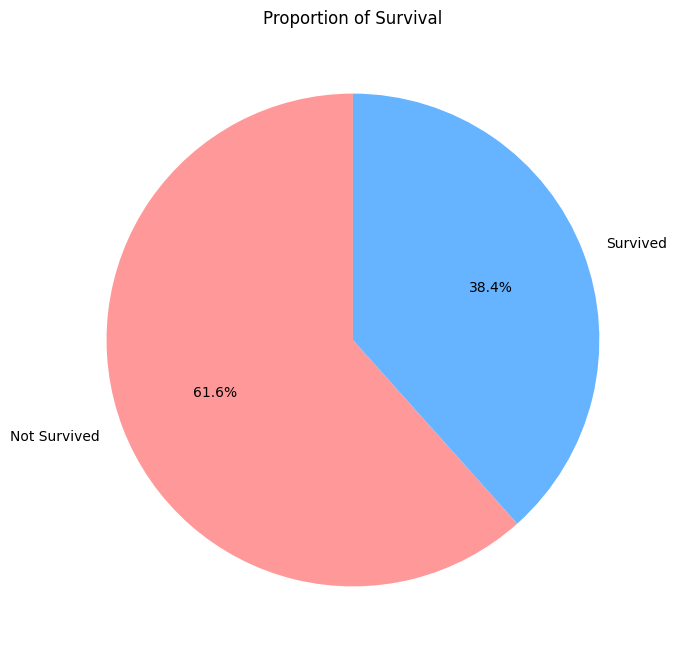

In [58]:
# Pie Chart: Proportion of Survival
survival_counts = df['survived'].value_counts()
labels = ['Not Survived', 'Survived']
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Survival')
plt.show()

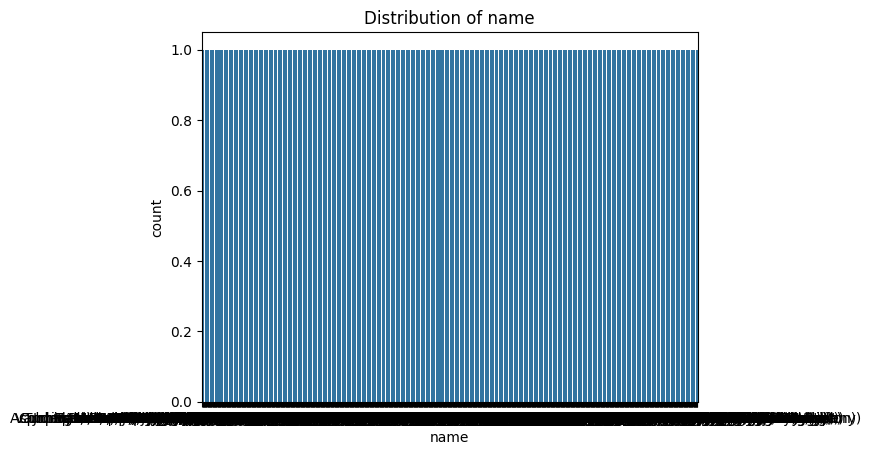

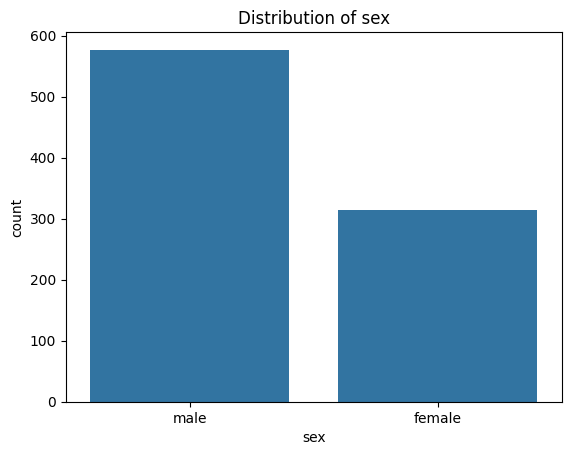

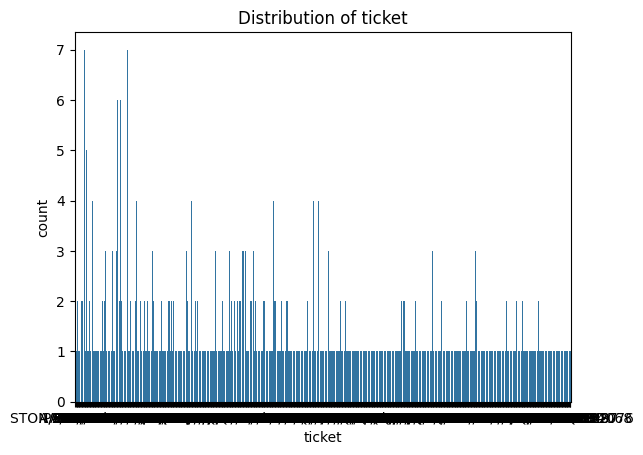

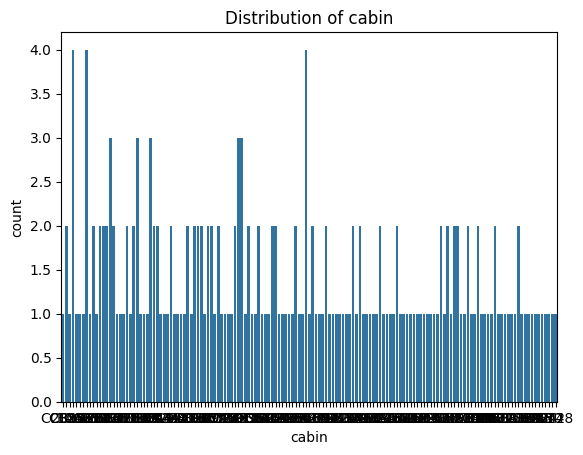

In [59]:
# Categorical feature distributions
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

### Bivariate Analysis

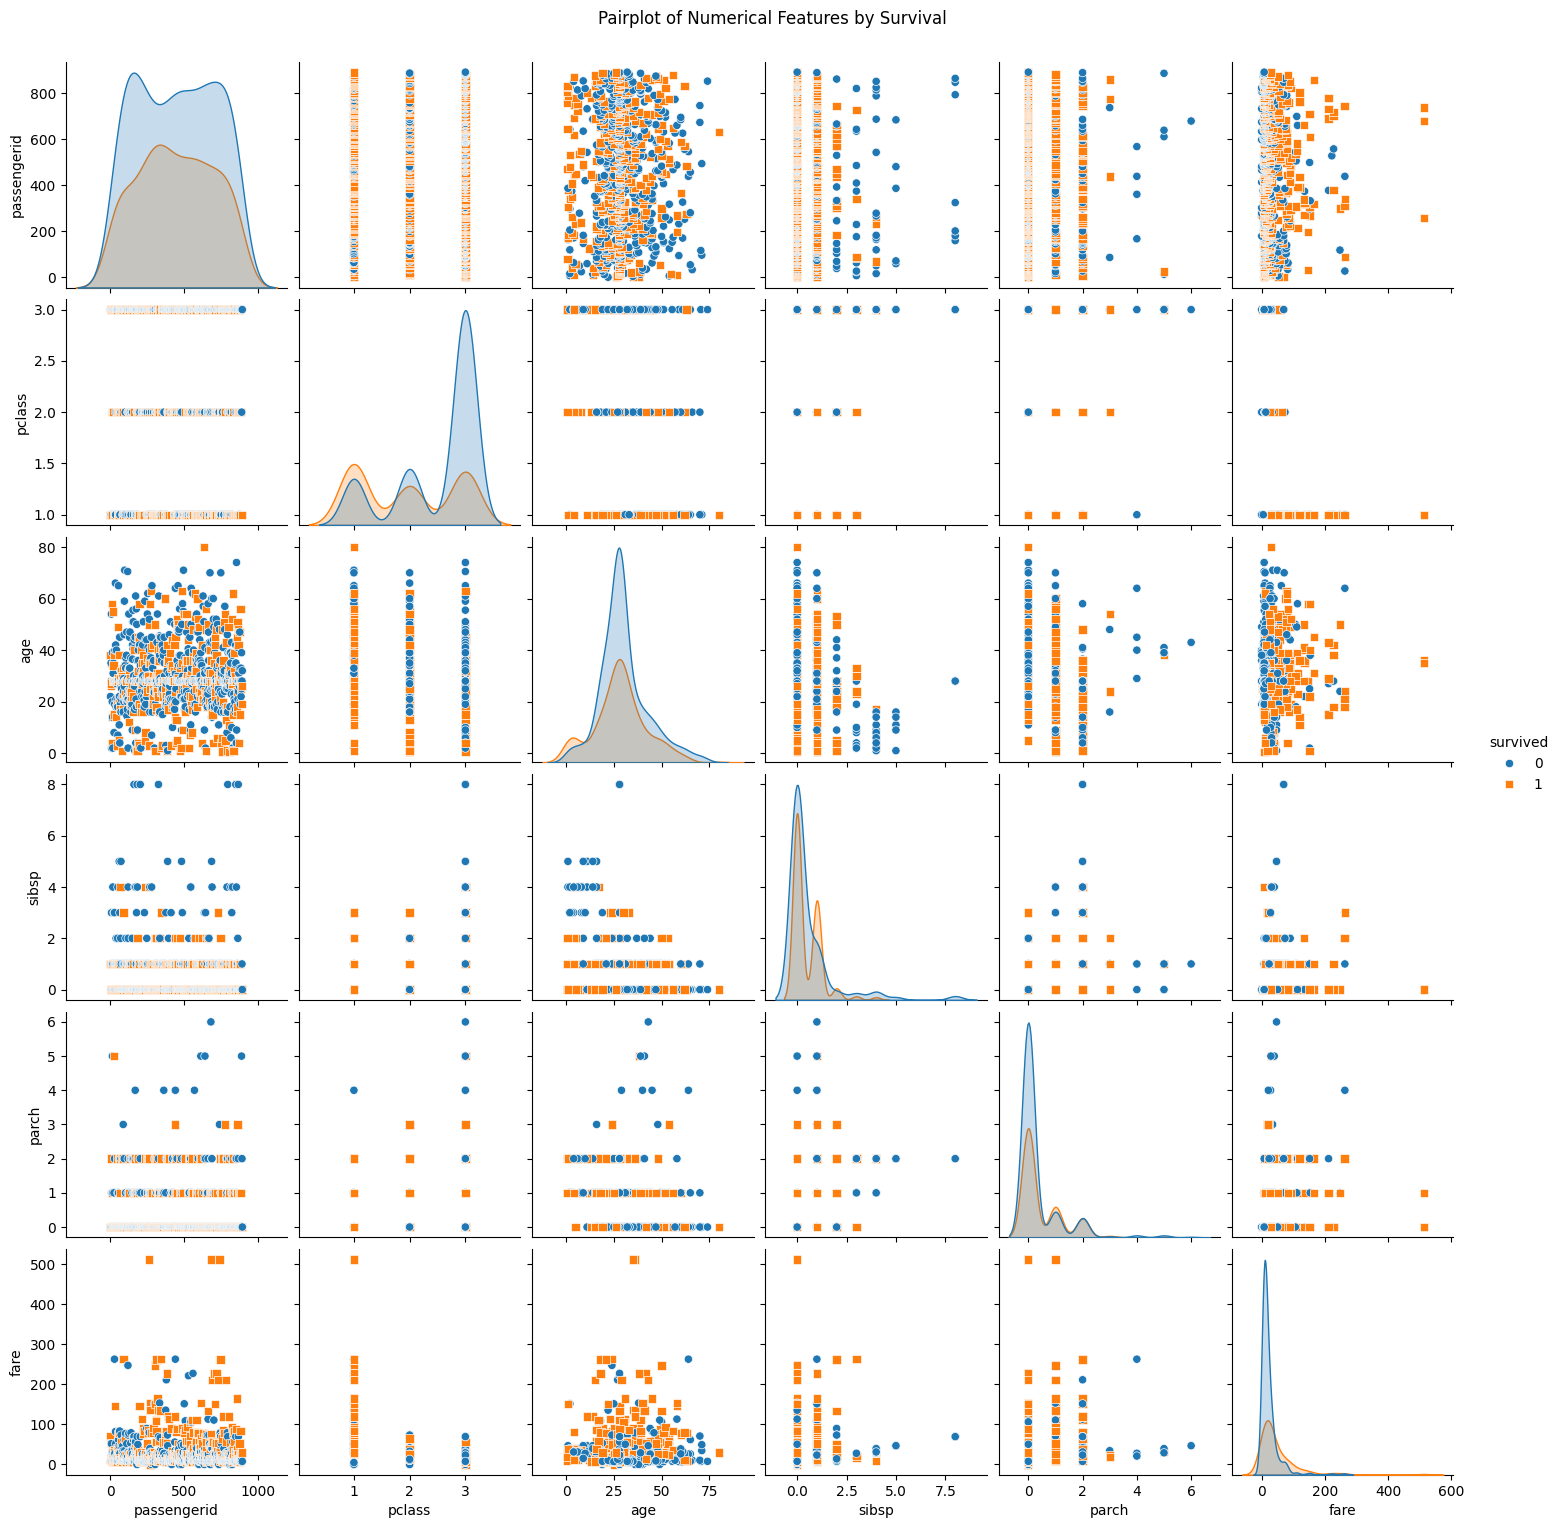

In [60]:
# Pairplot of numerical features colored by survival
sns.pairplot(df, hue='survived', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()

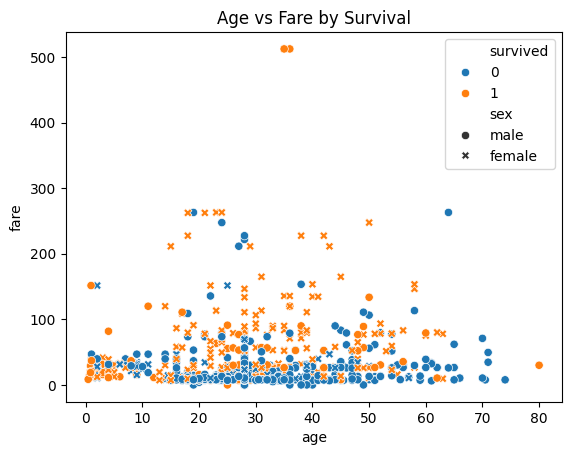

In [11]:
# Scatter plot for age vs fare by survival
sns.scatterplot(x='age', y='fare', hue='survived', style='sex', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

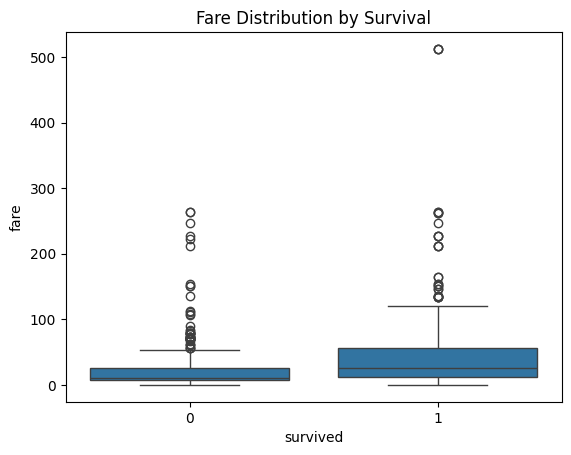

In [61]:
# Boxplot for survival by fare
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

### Multivariate Analysis

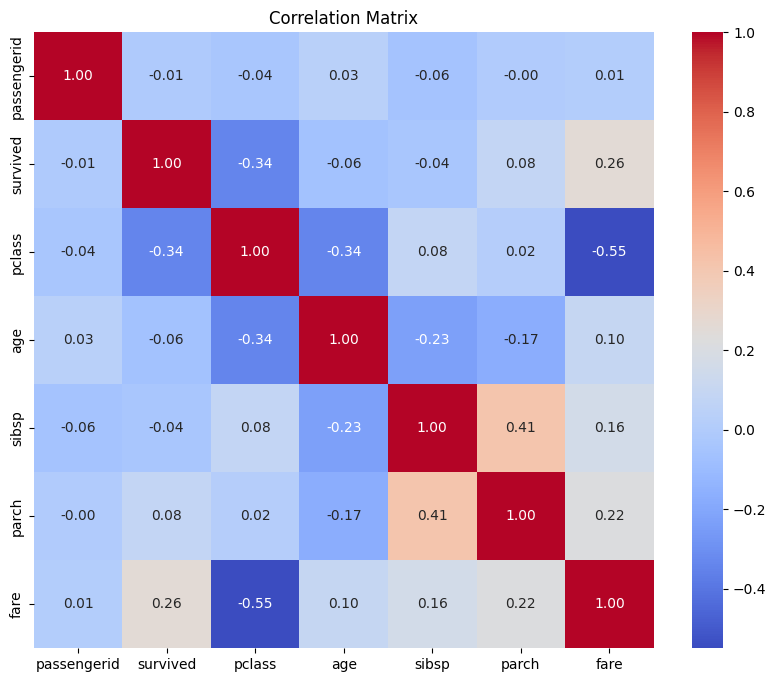

In [62]:
# Compute the correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Clustering Analysis

In [63]:
# Standardize numerical data for clustering
numerical_columns = ['age', 'fare', 'sibsp', 'parch']
scaled_data = StandardScaler().fit_transform(df[numerical_columns].dropna())

In [64]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)
print(df['cluster'].value_counts())

cluster
2    590
1    177
0    124
Name: count, dtype: int64


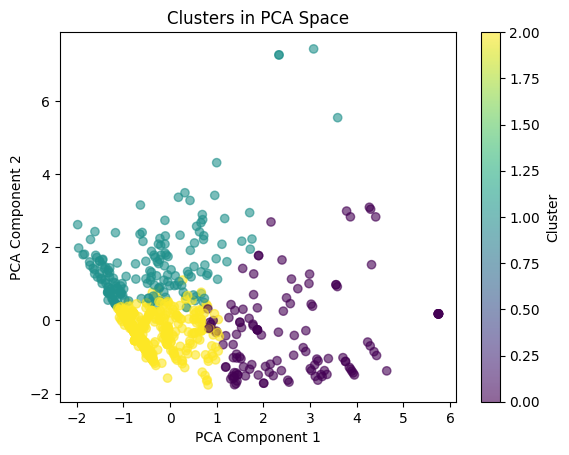

In [65]:
# PCA for visualization of clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Predictive Modeling: Survival Prediction

In [69]:
# Prepare data for predictive modeling
X = pd.get_dummies(df[['age', 'fare', 'pclass', 'sex']], drop_first=True)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1370458411081076
R-squared: 0.4351764221180513


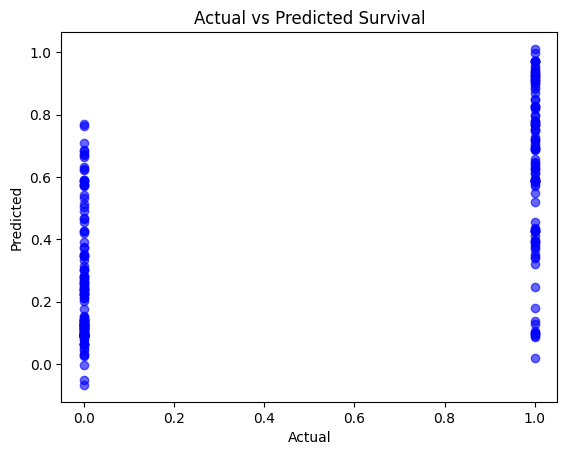

In [72]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.title('Actual vs Predicted Survival')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [73]:
import datetime
import numpy as np

# Generate synthetic timestamps for the dataset
np.random.seed(42)
num_entries = len(df)
start_date = datetime.datetime(1912, 1, 1)
date_range = [start_date + datetime.timedelta(days=int(np.random.uniform(0, 300))) for _ in range(num_entries)]
df['timestamp'] = date_range
df.set_index('timestamp', inplace=True)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,cluster
timestamp,,,,,,,,,,,,
1912-04-22,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1912-10-12,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
1912-08-07,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
1912-06-28,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
1912-02-16,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2


In [74]:
# Aggregate average fare and survival rate over time by month
monthly_data = df.resample('M').agg({'fare': 'mean', 'survived': 'mean'})
monthly_data.head()

<ipython-input-74-62cf25bfb1d4>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({'fare': 'mean', 'survived': 'mean'})


,fare,survived
timestamp,,
1912-01-31,34.981641,0.356436
1912-02-29,29.600573,0.333333
1912-03-31,37.571313,0.397436
1912-04-30,25.413030,0.351064
1912-05-31,24.838621,0.410256


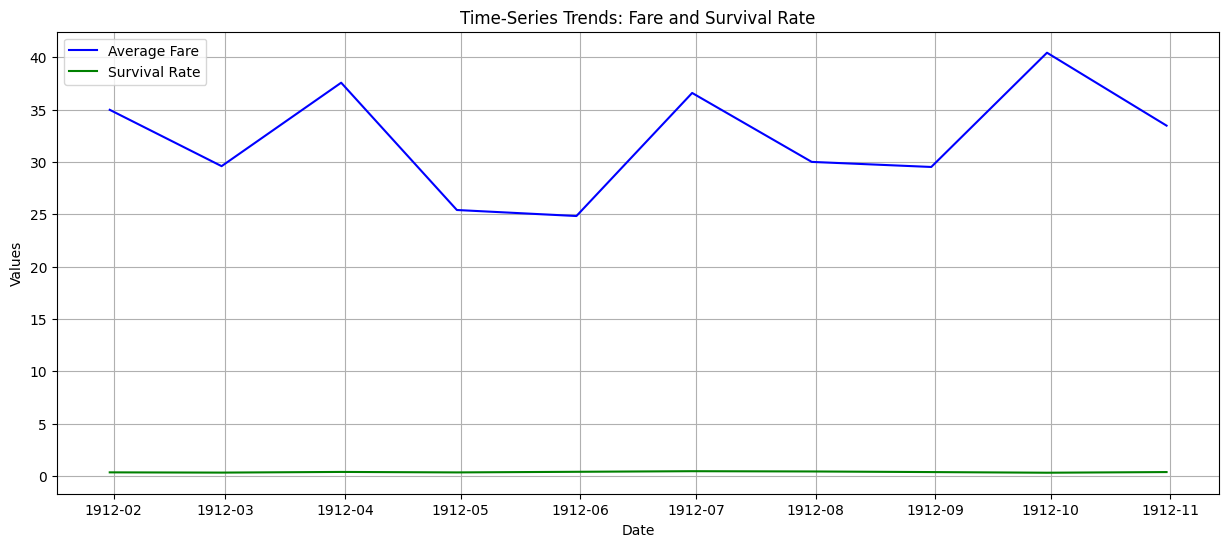

In [75]:
# Plot trends for fare and survival rate over time
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(monthly_data.index, monthly_data['fare'], label='Average Fare', color='blue')
plt.plot(monthly_data.index, monthly_data['survived'], label='Survival Rate', color='green')
plt.title('Time-Series Trends: Fare and Survival Rate')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

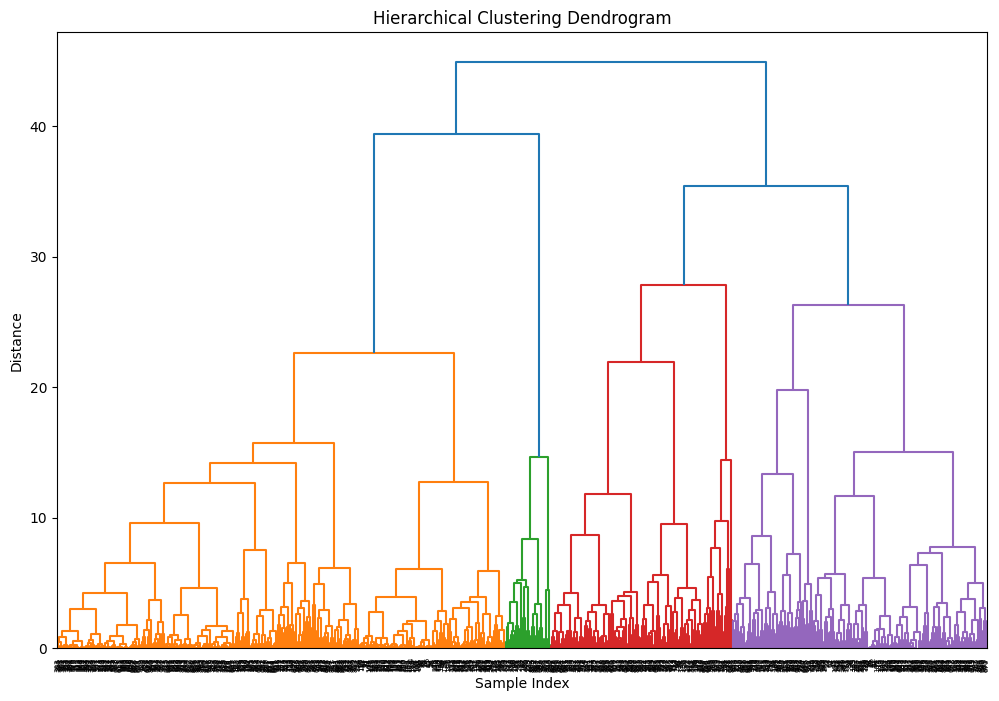

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns for clustering
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = df[numeric_columns].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=0.7 * max(linked[:, 2])
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()